In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid', palette='muted')

Load the data set and check dimentions and take the look at data

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_retail.csv', encoding='ISO-8859-1')

# Check dimentions and preview the fisrt few rows
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (541909, 9)


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Data set got 9 colunms and 541909 data rows

In [4]:
# Checking the data structure, datatypes and non-null counts
print(df.info())

# Get summary statics for columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB
None
              index       Quantity      UnitPrice     CustomerID
count  541909.00000  541909.000000  541909.000000  406829.000000
mean   270954.00000       9.552250       4.611114   15287.690570
std    156435.79785     218.081158      96.759853    1713.600303
min         0.00000  -80995.000000  -11062.060000   12346.000000
25%    135477.00000     

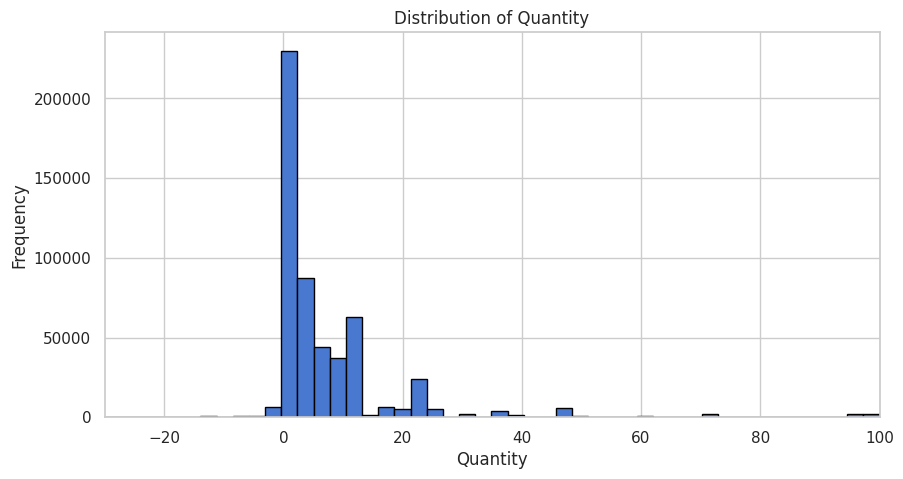

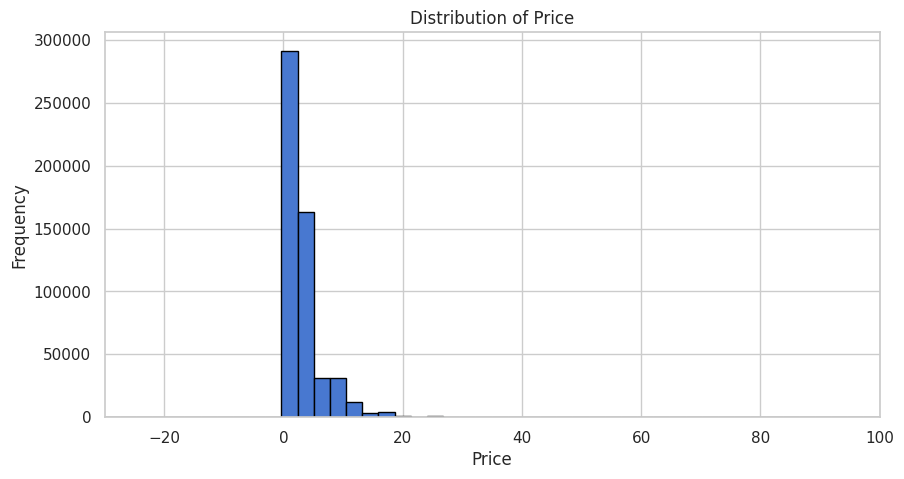

In [5]:
# Visualize distributions of numerical features using histograms

bin_edges = np.linspace(-60, 100, 60)

# Plot histogram for 'quantity'
plt.figure(figsize=(10, 5))
plt.hist(df['Quantity'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(-30,100)
plt.show()

# Plot histogram for 'UnitPrice'
plt.figure(figsize=(10, 5))
plt.hist(df['UnitPrice'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(-30,100)
plt.show()


Getting an idea about customers' transaction counts

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64


<ipython-input-13-3744b69de3d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='viridis')


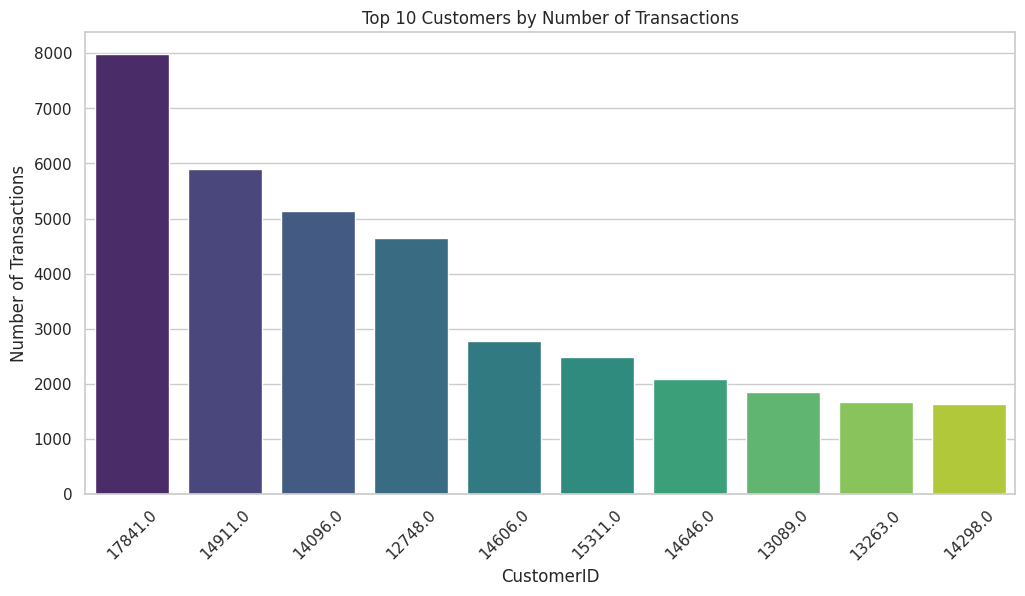

In [13]:
# Compute the count of transactions per CustomerID
customer_counts = df['CustomerID'].value_counts()

print(customer_counts)

# Select the top 10 customers
top_customers = customer_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='viridis')
plt.title('Top 10 Customers by Number of Transactions')
plt.xlabel('CustomerID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Check for Missing Values

In [7]:
# Get missing counts for each column
missing_counts = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_counts)

Missing values per column:
 CustomerID     135080
Description      1454
index               0
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


TODO: Columns with many missing values such as CustomerID may require treatments depending on future analysis

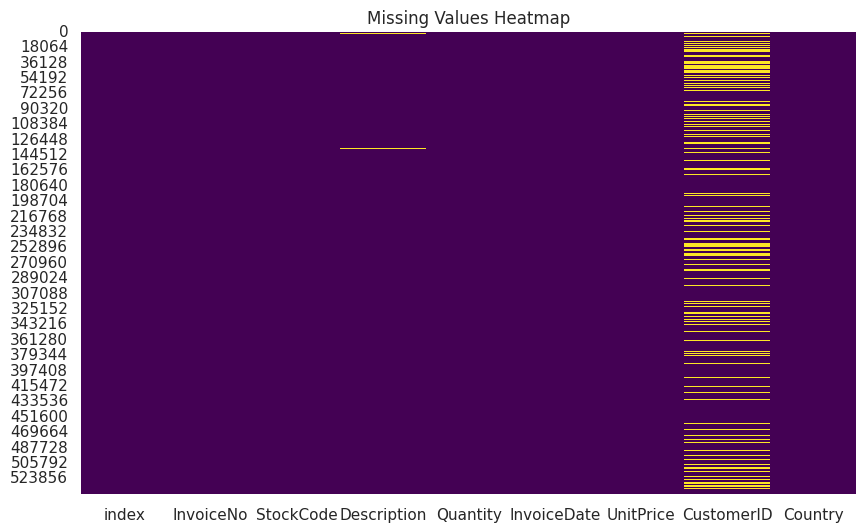

In [8]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Data Type Conversion and Date Parsing

Handling InvoiceDate and convert to date and time

In [9]:
# Convert InvoiceDate to datetime to for more accurate feature extraction in future steps
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("InvoiceDate conversion sample:")
display(df['InvoiceDate'].head())

<ipython-input-9-519e497b3a71>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


InvoiceDate conversion sample:


,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00


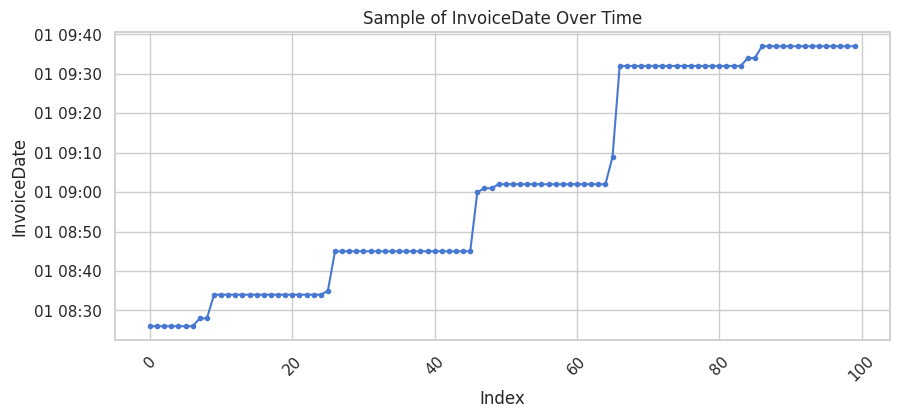

In [10]:
# Visualize a sample of the date conversion
plt.figure(figsize=(10, 4))
plt.plot(df['InvoiceDate'].iloc[:100], marker='o', linestyle='-', markersize=3)
plt.title("Sample of InvoiceDate Over Time")
plt.xlabel("Index")
plt.ylabel("InvoiceDate")
plt.xticks(rotation=45)
plt.show()

# Analysis of Categorical Attributes

InvoiceNo and StockCodes are unique identifiers. Examinig their uniquness can reveal data quality

In [11]:
# Check unique counts for InvoiceNo and StockCode
print("Unique InvoiceNo:", df['InvoiceNo'].nunique())
print("Unique StockCode:", df['StockCode'].nunique())

Unique InvoiceNo: 25900
Unique StockCode: 4070


In [12]:
# Display sample product descriptions
sample_descriptions = df['Description'].dropna().unique()[:10]
print("Sample Descriptions:", sample_descriptions)

Sample Descriptions: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
